## **Example of a waveform/cloud model for a vector ultralight boson**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Superrad

* For a given ultralight boson spin (here 1 is chosen, corresponding to a vector) 
and cloud model (described below), 
one first creates an UltralightBoson object. For some models, this requires reading in data files, etc., 
but only needs to be done once. 

In [2]:
from superrad import ultralight_boson as ub
bc = ub.UltralightBoson(spin=0, model="non-relativistic")

* a waveform model can then be constructed corresponding to specific physical parameters of the system, 
in this case an initial black hole of $M = 10^{6} M_\odot$  , dimensionless spin of 0.5 ($\chi=0.5$), and an ultralight boson mass of $1.7 \times 10^{-17}$ eV

In [3]:
wf = bc.make_waveform(10**6, 0.5, 1.7e-17, units="physical",evo_type="matched")

* this can be used to determine various properties of the black hole-boson cloud system that arises through the superradiant instability. For example:

In [4]:
print(wf.cloud_growth_time())# Cloud growth time in seconds
print(wf.mass_cloud(0)) #Cloud mass at saturation in solar mass
print(wf.spin_bh_final()) #Final black hole spin 
print(wf.gw_time())#*tunit)#characteristic timescale of GW emission (Mcloud/P_{GW}) at saturation.
print(wf.efold_time())

137179836867599.7
3507.1134503339417
0.47571411235402933
2.0158859270306643e+17
689844898328.8677


In [5]:
import healpy
import h5py

orbit_file_name='/local/home/dd274198/Documents/lisaenv/keplerian-orbits-1-0-2.h5'
with h5py.File(orbit_file_name, 'r') as fi:
    orbit_t0 = fi.attrs['t0']
    duration=fi.attrs['tduration']
    #print(fi.attrs.keys())
    print(duration)
    print(orbit_t0)
    print(fi.attrs['t'])
    print(fi.attrs['tsize'])


31536000.0
0.0
[0.000000e+00 8.640000e+03 1.728000e+04 ... 3.151008e+07 3.151872e+07
 3.152736e+07]
3650


In [8]:
Tobs=3.145e+7 #364jours
dObs=100 
dt=10
N=(int((Tobs-(orbit_t0 + 10))/dt))
N_i=(int((Tobs//2-(orbit_t0 + 10))/dt))
print(N)
print(N_i)
t = orbit_t0 + 10 + np.linspace(0,Tobs,int(N_i))
print(len(t))
print(int(dt*int(N)))

1257999
628999
628999
31449975


* It can also be used to calculate the resulting gravitational wave signal as a function of time.

In [8]:
sec_hour = 3600.0
#t = np.arange(0,10**4,50)
#dt=50
sec_day=sec_hour*24
sec_year=sec_day*365
#t_freq = np.linspace(0,10**9*sec_year,200)
t_freq = np.arange(0,10**9*sec_year,10**2*sec_year)
print(len(t))
print(len(t_freq))
#t_freq=np.arange(0,sec_year*4*10**10,dt_freq)
#t = np.linspace(0,24*sec_hour, 256) #time
thetaObs = np.pi/4 #Observing angle w.r.t. spin axis
phi=wf.phase_gw(t)
hp,hx,delta = wf.strain_amp(t_freq,thetaObs,dObs)# Strain at d=12660 Mpc
hp0_f,hx0_f,delta=wf.strain_amp(t,thetaObs,dObs)
hp_f,hx_f=hp0_f*np.cos(phi),hx0_f*np.sin(phi)
fgw = wf.freq_gw(t_freq)

1572499
10000000


NameError: name 't_freq' is not defined

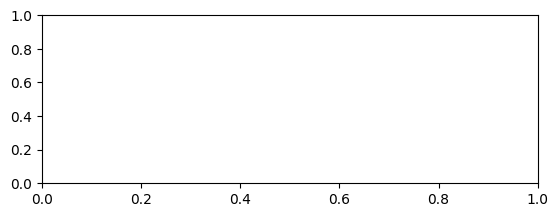

In [7]:
plt.figure(1)


plt.subplot(211)
plt.semilogx(t_freq/sec_year, np.abs(hp), color='blue', label='hp')
plt.ylabel(r"$h0_{+}$")
plt.subplot(212)
plt.semilogx(t_freq/sec_year, np.abs(hx), color='orange', label='hx')
plt.ylabel(r"$h0_{\times}$")
plt.xlabel('t(years)')
plt.show()

plt.figure(2)
plt.subplot(211)
plt.semilogx((t_freq/sec_year),fgw, color='blue')#*tunit
plt.ylabel(r"$f_{\rm GW}$ (Hz)")
plt.xlabel(r"$t$ (years)")
#plt.xlim([0,10**9])
plt.show()

plt.figure(3)
plt.subplot(211)
plt.plot(t/sec_hour, (hp0_f*np.cos(phi)), color='blue', label='hp')
plt.ylabel(r"$h_{+}$")
plt.subplot(212)
plt.plot(t/sec_hour, (hx0_f*np.sin(phi)), color='orange', label='hx')
plt.ylabel(r"$h_{\times}$")
plt.xlabel('t(hours)')
plt.show()


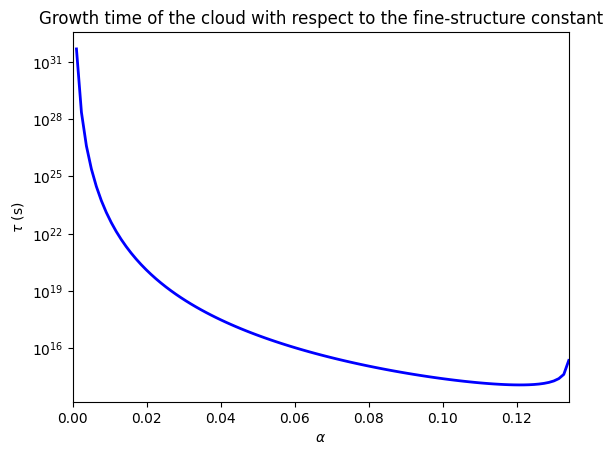

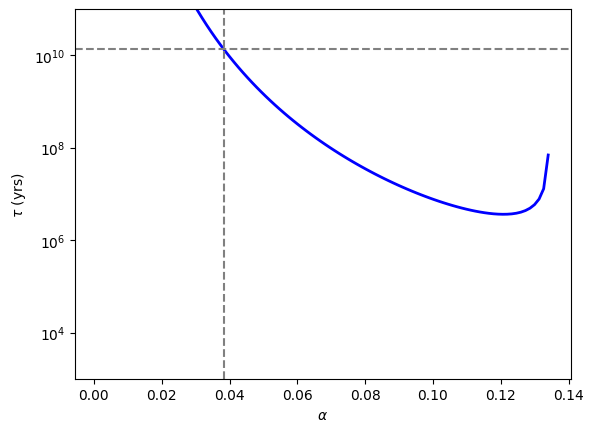

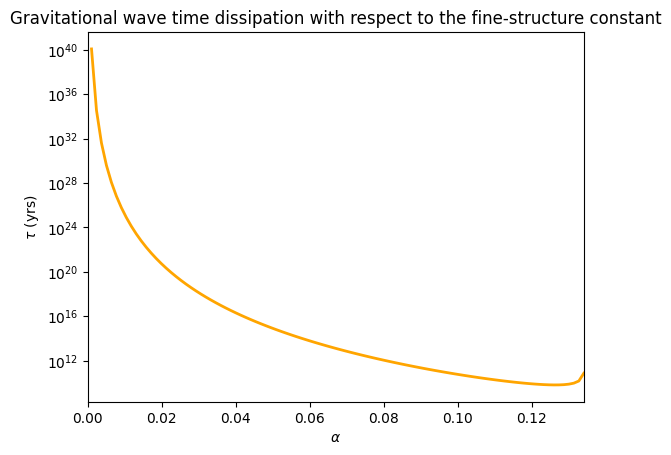

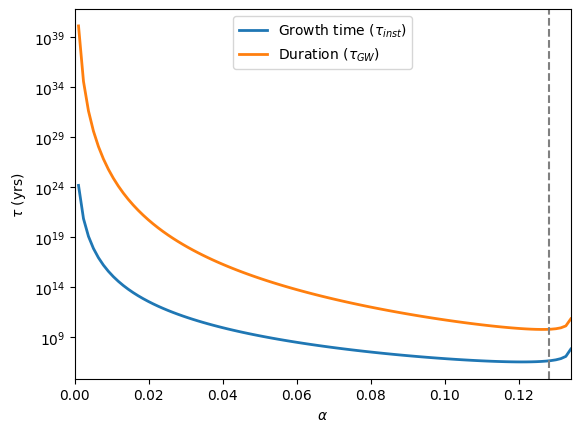

In [65]:

# create an array of alphas
alphas = np.linspace(0.001, 0.134, 100)
# for each of those values, compute the instability timescale numerically
tinsts_amp1 = []
tinsts_amp2 = []
tinsts_gw2 = []


for a in alphas:
    bc1= ub.UltralightBoson(spin=0, model="non-relativistic")
    wf1 = bc1.make_waveform(10**6,0.5,mu=((a*6.62607e-34*3e8)/(2*np.pi*1.48e9))*(1/1.6e-19), units="physical")
    tinsts_amp1.append(wf1.cloud_growth_time())
    
for a in alphas:
    bc2= ub.UltralightBoson(spin=0, model="non-relativistic")
    wf2 = bc2.make_waveform(10**6,0.5,mu=((a*6.62607e-34*3e8)/(2*np.pi*1.48e9))*(1/1.6e-19), units="physical")
    tinsts_amp2.append(wf2.cloud_growth_time()/sec_year)
    tinsts_gw2.append(wf2.gw_time()/sec_year)
    

plt.figure(1)
plt.plot(alphas, tinsts_amp1, lw=2, c='blue')
plt.xlim(0, 0.134);
plt.yscale('log');
plt.ylabel(r'$\tau$ (s)');
plt.xlabel(r'$\alpha$');
plt.title('Growth time of the cloud with respect to the fine-structure constant')
plt.figure(2)
plt.plot(alphas, tinsts_amp2, lw=2, c='blue')
plt.yscale('log');
plt.ylabel(r'$\tau$ (yrs)');
plt.xlabel(r'$\alpha$');
plt.ylim(10**3, 10**11);
plt.axhline(y=13.8e9,ls='--', c='gray')
plt.axvline(x=0.0385, ls='--', c='gray')


plt.figure(3)
plt.plot(alphas, tinsts_gw2, lw=2, c='orange')
plt.xlim(0, 0.134);
plt.yscale('log');
plt.ylabel(r'$\tau$ (yrs)');
plt.xlabel(r'$\alpha$');
plt.title('Gravitational wave time dissipation with respect to the fine-structure constant')

plt.figure(4)
plt.plot(alphas, tinsts_amp2, label=r'Growth time ($\tau_{inst})$', lw=2, ls='-')
plt.plot(alphas, tinsts_gw2, label=r'Duration ($\tau_{GW}$)', lw=2, ls='-')
plt.xlim(0, 0.134);
plt.yscale('log');
plt.ylabel(r'$\tau$ (yrs)');
plt.xlabel(r'$\alpha$');
plt.axvline(x=0.128, ls='--', c='gray')


plt.legend(loc='best');



# GW_Response

In [9]:
from lisagwresponse import ReadStrain

rs=ReadStrain(t,hp_f,hx_f,strain_interp_order=5,orbits=orbit_file_name, 
             orbit_interp_order=2, dt=10, size=int(N_i),gw_beta=np.pi / 2, gw_lambda=0,t0=orbit_t0+10)

[1.000000e+01 2.000000e+01 3.000000e+01 ... 1.572497e+07 1.572498e+07
 1.572499e+07]
1572499


/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


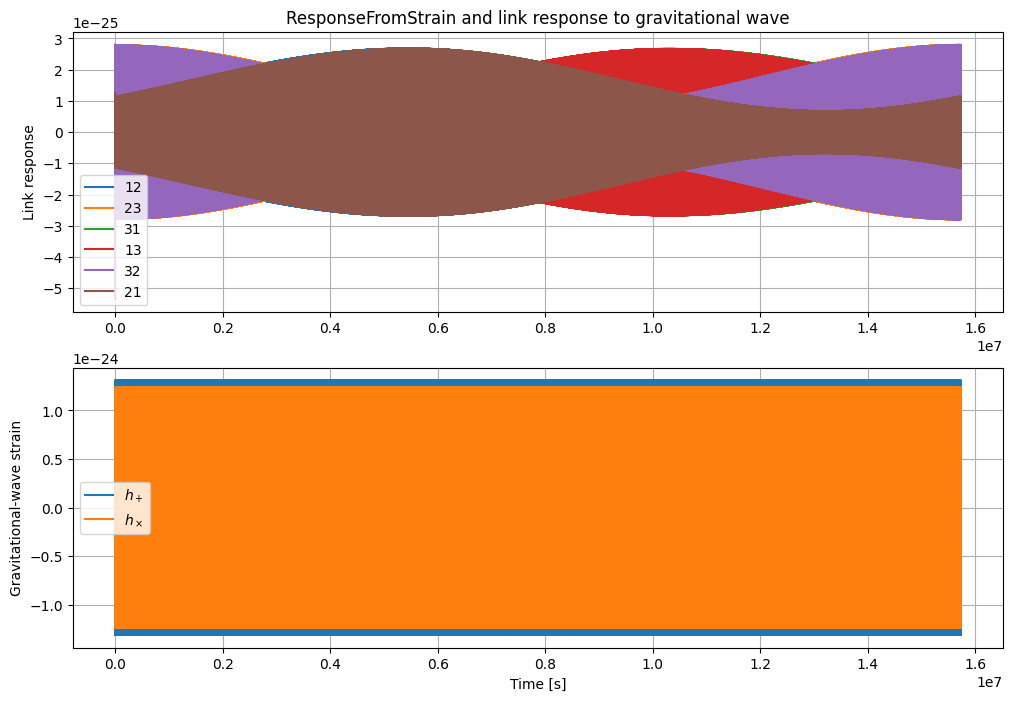

In [10]:
#SC = [1, 2, 3]
print(rs.t)
print(len(rs.t))
LINKS = [12, 23, 31, 13, 32, 21]
#response_all = rs.compute_gw_response(rs.t,LINKS)
#response_12 = rs.compute_gw_response( t+orbit_t0+10,[12])[0]
#response_23 = rs.compute_gw_response( t+orbit_t0+10,[23])[0]
#response_31 = rs.compute_gw_response( t+orbit_t0+10,[31])[0]
#response_13 = rs.compute_gw_response( t+orbit_t0+10,[13])[0]
#response_32 = rs.compute_gw_response( t+orbit_t0+10,[32])[0]
#response_21 = rs.compute_gw_response( t+orbit_t0+10,[21])[0]
rs.plot(rs.t) # show plot


In [11]:
LINKS = [12, 23, 31, 13, 32, 21]
response=rs.compute_gw_response(rs.t,LINKS)
#plt.plot(rs.t+orbit_t0+10,response_bis) # show plot
rs.write('gwresponse_file_test.h5')

# LisaInstrument

In [12]:
import lisainstrument
from lisainstrument import Instrument
import pytdi
import pytdi.michelson
from pytdi.michelson import X2, Y2, Z2
from pytdi import Data
central_freq = 2.816E14
# save strain to file
strain_file = "gwresponse_file_test.h5"


# give gw file to pytdi
data = Data.from_gws(strain_file, orbit_file_name)
built_gw_X2 = X2.build(**data.args)
X2_gw = built_gw_X2(data.measurements)
built_gw_Y2 = Y2.build(**data.args)
Y2_gw = built_gw_Y2(data.measurements)
built_gw_Z2 = Z2.build(**data.args)
Z2_gw = built_gw_Z2(data.measurements)

#A2_gw = (Z2_gw - X2_gw) / np.sqrt(2)
#E2_gw = (X2_gw - 2 * Y2_gw + Z2_gw) / np.sqrt(6)
#T2_gw = (X2_gw + Y2_gw + Z2_gw) / np.sqrt(3)

In [9]:
import lisainstrument
from lisainstrument import Instrument
import pytdi
import pytdi.michelson
from pytdi import Data
from pytdi.michelson import X2, Y2, Z2
from scipy import constants

dt=10
t0 = orbit_t0 + 10
#tmax = 364 * constants.day
#N_tot= int((tmax-t0)/ dt_instru)
#print(N_tot*dt)
skipped = int(1e5)
central_freq = 2.816E14

instru_n = Instrument(t0=t0, size=N_i, 
                      physics_upsampling=4, 
                      dt=dt, 
                      orbits=orbit_file_name, 
                      central_freq=central_freq,lock='six',aafilter=None)
instru_n.disable_all_noises(but='pathlength')
#instru_n.disable_all_noises(but='clock')
#instru_n.disable_all_noises(but='modulation')
instru_n.simulate()

data = pytdi.Data.from_instrument(instru_n)
#data_total = pytdi.Data.from_instrument(instru_n, skipped=skipped, signals='total')
X2n_built = pytdi.michelson.X2.build(**data.args)
data_X2_n = X2n_built(data.measurements)/central_freq
Y2n_built = pytdi.michelson.Y2.build(**data.args)
data_Y2_n = Y2n_built(data.measurements)/central_freq
Z2n_built = pytdi.michelson.Z2.build(**data.args)
data_Z2_n = Z2n_built(data.measurements)/central_freq

#data_A2_n = (data_Z2_n - data_X2_n) / np.sqrt(2)
#data_E2_n = (data_X2_n - 2 * data_Y2_n + data_Z2_n) / np.sqrt(6)
#data_T2_n = (data_X2_n + data_Y2_n + data_Z2_n) / np.sqrt(3)

#instru_n.plot_fluctuations()      

Missing orbit information at 
[1.00000000e+01 1.62500000e+01 2.25000000e+01 ... 3.14499662e+07
 3.14499725e+07 3.14499788e+07]


ValueError: missing orbit information, use longer orbit file or adjust sampling

# PSD

In [9]:
c = 299792458.0
L=2.5e9
dt=25. # time step in seconds
Tobs=len(t) # Duration 
N = int(Tobs/dt) # Number of points to generate 
#Te=Tobs/(N_tot-1)

## Minimal frequency for plotting
fMin = 2e-5
## Minimal frequency for plotting
fMax = 1
N_freq=int(N/2)
f0= np.linspace(fMin,fMax,int(N_freq)//2)
f= np.fft.rfftfreq(N_freq, d=25)
fe=(fMax-fMin)/N_freq
df=(fMax-fMin)
print(len(f0))

#S_Oms=(15e-12*((2*np.pi*f)/c)*np.sqrt(1+(2e-3/f)**4))**2
#S_acc=((3e-15/(2*np.pi*f*c))*np.sqrt(1+(0.4e-3/f)**2)*(np.sqrt(1+(f/8e-3)**4)))**2
#Sn_X2=64*(np.sin(2*np.pi*f*L))**2*(np.sin(4*np.pi*f*L))**2*(S_Oms+(3+(np.cos(4*np.pi*f*L)))*S_acc)

f1=0.4e-3
#S_I=5.76e-48*(1+(f1/f)**2)
S_II=3.6e-41
#Sn_Scrid=(8*np.pi*f*L)**2*np.sin(2*np.pi*f*L)**2*(2*np.sin(4*np.pi*f*L)**2)*(S_I/(2*np.pi*f)**4+S_II)
#plt.loglog(f,Sn_X2, label='Sn_X2')
#plt.loglog(f,Sn_Scrid, label ='Sn_Scrid')
#plt.legend()


15724


In [16]:
## Armlength in seconds
c = 299792458.0
L_m = 2.5e9
L = L_m/c

## Noise level in the Science Requirement Document
sqSnoise_SciRD = [3e-15,15e-12]
def PSD_Noise_components(f, sqSnoise):
    [sqSacc_level, sqSoms_level] = sqSnoise
    # sqSacc_level: Amplitude level of acceleration noise [3e-15]
    # sqSoms_level: Amplitude level of OMS noise [15e-12]
    
    
    ### Acceleration noise
    Sa_a = sqSacc_level**2 *(1.0 +(0.4e-3/f)**2)*(1.0+(f/8e-3)**4)
    Sa_d = Sa_a*(2.*np.pi*f)**(-4.)
    Sa_nu = Sa_d*(2.0*np.pi*f/c)**2

    ### Optical Metrology System
    Soms_d = sqSoms_level**2 * (1. + (2.e-3/f)**4)
    Soms_nu = Soms_d*(2.0*np.pi*f/c)**2
    
    return [Sa_nu, Soms_nu]

def PSD_Noise_X20(f, sqSnoise):
    [Sa_nu,Soms_nu] = PSD_Noise_components(f, sqSnoise)
    omegaL = 2*np.pi*f*L
    return 64 * (np.sin(omegaL))**2 * ( np.sin(2*omegaL))**2 * (Soms_nu + Sa_nu*(3+np.cos(2*omegaL)) )




def Pd_num(x,dt):
    window=np.blackman(len(x))
    N_w=np.sum(window**2)
    return dt*(2/N_w)*(np.abs(np.fft.rfft(window*x)))**2

In [17]:
import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True
f= np.fft.rfftfreq(N_i,d=10)
#PSD_sciRD_A2_usb = get_noise_model("SciRDv1",f).psd(option='A',tdi2=True)
#PSD_sciRD_E2_usb = get_noise_model("SciRDv1",f).psd(option='E',tdi2=True)
#PSD_sciRD_T2_usb = get_noise_model("SciRDv1",f).psd(option='T',tdi2=True)
PSD_sciRD_X2_usb = get_noise_model("SciRDv1",f[1:]).psd(option='X',tdi2=True)

print(len(f))
print(f[0])
print(f)

786250
0.0
[0.00000000e+00 6.35930452e-08 1.27186090e-07 ... 4.99998410e-02
 4.99999046e-02 4.99999682e-02]


ValueError: x and y must have same first dimension, but have shapes (1572299,) and (786050,)

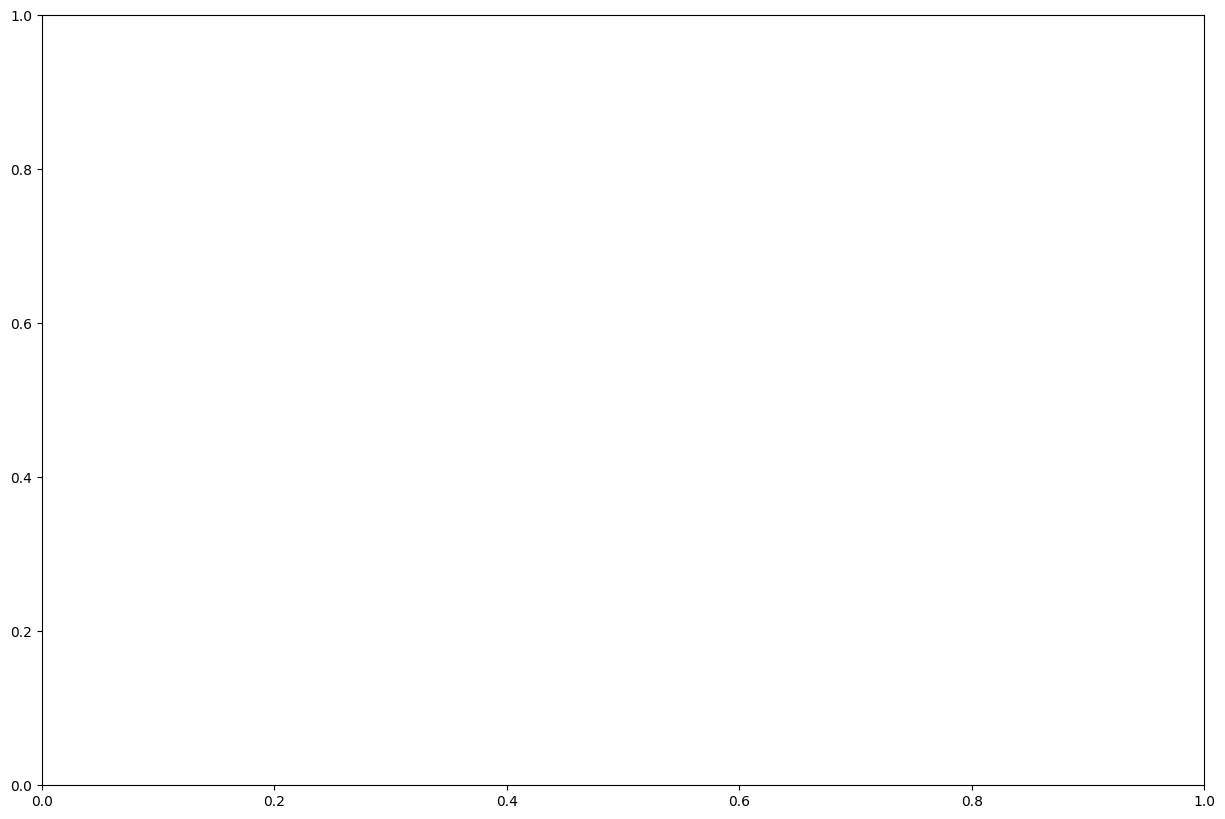

In [17]:
#instru_n.plot_fluctuations()   
plt.figure(figsize=(15,10))
#plt.plot(t[1000:], data_A2_n[1000:])
#plt.plot(t[1000:], data_E2_n[1000:])
#plt.plot(t[1000:], data_T2_n[1000:])
plt.plot(t[100:-100], data_X2_n[100:-100])
plt.title('Residual noises')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.ylim([-0.01e-18,0.01e-18])

plt.figure(figsize=(15,10))
#plt.plot(t[1000:], A2_gw[1000:])
#plt.plot(t[1000:], E2_gw[1000:])
#plt.plot(t[1000:], T2_gw[1000:])
#plt.plot(t,X2_gw)
#plt.title('GW response')
#plt.xlabel('time (s)')
#plt.ylabel('amplitude')


(1e-05, 0.06)

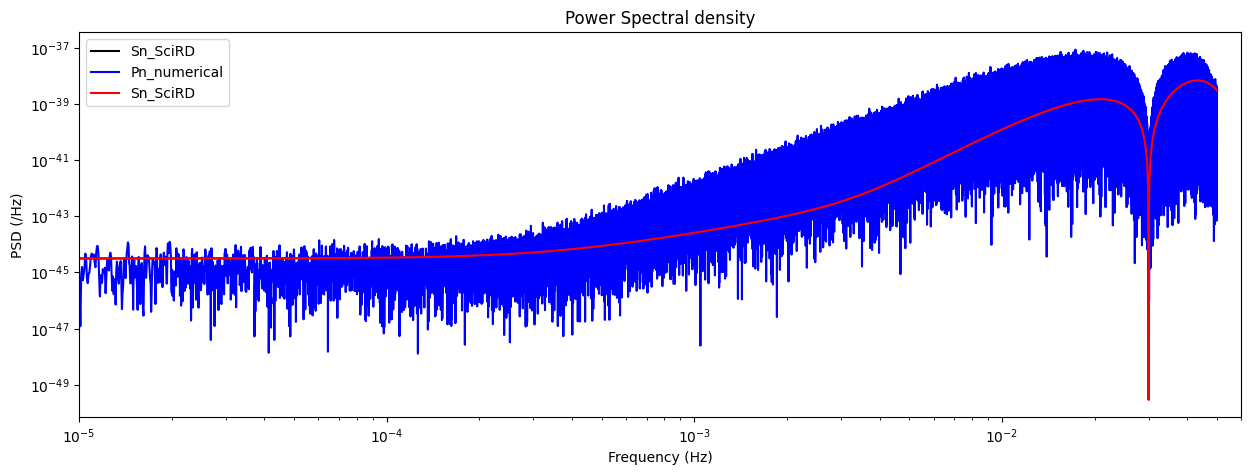

In [18]:
plt.figure(figsize=(15,5))

plt.loglog(f[1:],PSD_Noise_X20(f[1:],sqSnoise_SciRD), label='Sn_SciRD',c='black')
plt.loglog(f[1:],Pd_num(data_X2_n,dt)[1:],label='Pn_numerical',c='blue')
plt.loglog(f[1:],PSD_sciRD_X2_usb, label='Sn_SciRD',c='red')
#plt.loglog(f[1:],Pd_num(X2_gw,dt)[1:],label='Ps_numerical')
plt.legend()
plt.title('Power Spectral density')
plt.ylabel('PSD (/Hz)')
plt.xlabel('Frequency (Hz)')
plt.xlim([1e-5,6e-2])




In [26]:
TF_x=np.fft.rfft(X2_gw[1000:])
#plt.loglog(f,np.abs(TF_x))
#plt.title('Signal Discrete Fourier Transform')
#plt.ylabel('Amplitude')
#plt.xlabel('Frequency (Hz)')
#plt.xlim([4e-4,1])

# Sensitivity

In [54]:
phiL = 2*np.pi*f[1:]*L
def Sh_X_exp(PSD_x,R_LX):
    return PSD_x/np.mean(np.abs(np.fft.rfft(R_LX)**2))

S_theo=(20/3)*(1+0.6*(phiL)**2)*((PSD_Noise_X20(f[1:],sqSnoise_SciRD))/((4*phiL)**2*(np.sin(phiL)**2)*(2*np.sin(2*phiL))**2))
    

gamma = 60*180/np.pi
sg = np.sin(gamma)
cg = np.cos(gamma)
def fIte(eps,th1,u,cu,su,sg,cg):
    cth1 = np.cos(th1)
    sth1 = np.sin(th1)
    cth2 = cg*cth1+sg*sth1*np.cos(eps)
    sa = sg*np.sin(eps)/np.sqrt(1-cth2*cth2)
    eta = (cu-np.cos(u*cth1))*(cu-np.cos(u*cth2))*cth1*cth2+(su-cth1*np.sin(u*cth1))*(su-cth2*np.sin(u*cth2))
    #print(eps,th1,cth1,sth1,sa,eta,sa)
    return np.sin(th1)*(1-2*sa*sa)*eta
def Tarm(f):
    from scipy.integrate import dblquad
    w = 2*np.pi*f
    u = w*L
    cu = np.cos(u)
    su = np.sin(u)
    
    
    Iet = dblquad(fIte, 0, 2*np.pi, lambda x: 0, lambda x: np.pi, args=(u,cu,su,sg,cg))
    #print(Iet)
    return ((1+cu*cu)*(1./3.-2./(u*u))+su*su+4.*su*cu/(u*u*u))/(u*u) - Iet[0]/(4.*np.pi)

yTarm = np.zeros(len(f[1:]))
for i in range(len(f[1:])):
    yTarm[i] = Tarm(f[1:][i])            
yTarmN = yTarm/yTarm[0]
yTarmRN = yTarmN * (np.sin(np.pi/3.)**2/5)            
            
           
[Sa_nu,Soms_nu] = PSD_Noise_components(f[1:], sqSnoise_SciRD)
phiL = 2*np.pi*f[1:]*L
S_hX_SAL = (Soms_nu + Sa_nu*(3+np.cos(2*phiL)) ) / (phiL**2 * yTarmRN)
S_h_SAL = S_hX_SAL / 2

#long wavelength limit
#RXSALX20 = (4.*np.sin(2*np.pi*f*L))**2 * (2.*np.sin(4*np.pi*f*L))**2 * (2*np.pi*f)**2 * (L_m/c)**2 * yTarmRN
RXLWX20 = (3./20.) * (2*phiL)**2 * (2*np.sin(phiL))**2 * (2*np.sin(2*phiL))**2


plt.loglog(f[1:],np.sqrt(S_h_SAL),label='Sensitivity_theo_1',c='blue')
plt.loglog(f[1:],np.sqrt(S_theo/2),label='Sensitivity_theo_wl',c='orange')
#plt.loglog(f,np.sqrt(Sh_X_exp(Pd_num(X2_gw[1000:],N_w),X2_gw[1000:])),label='Sensitivity_numerical',c='black')
plt.legend()

plt.figure()
plt.loglog(f[1:],np.sqrt(S_h_SAL),label='Sensitivity_theo_1',c='blue')
plt.loglog(f[1:],np.sqrt(S_theo/2),label='Sensitivity_theo_wl',c='orange')
plt.loglog(f,np.sqrt(Sh_X_exp(Pd_num(X2_gw[1000:],N_w),X2_gw[1000:])),label='Sensitivity_numerical',c='black')
plt.legend()

KeyboardInterrupt: 

# SNR

In [21]:
TF_xtot=np.fft.fft(X2_gw)
S_exp=dt*TF_xtot
Tobs=10000

def Sh_X_exp(PSD_x,R_LX):
    return PSD_x/np.mean(np.abs(np.fft.rfft(R_LX)**2))

phiL = 2*np.pi*f[1:]*L
S_theo=(20/3)*(1+0.6*(phiL)**2)*((PSD_Noise_X20(f[1:],sqSnoise_SciRD))/((4*phiL)**2*(np.sin(phiL)**2)*(2*np.sin(2*phiL))**2))

def SNR_carre_exp(df,X,S_n):
    return df*4*np.real((X/S_n))


def SNR_ana(TF_hp,TF_hx,Sh_X,df):
    return df*4*np.real((TF_hp**2+TF_hx**2)/Sh_X)

#TF_hp=np.fft.rfft(hp_f[1001:])
#TF_hx=np.fft.rfft(hx_f[1001:])
#print('<SNR²_X> analytique pour f=8.2e-3 Hz :',SNR_ana(TF_hp,TF_hx,S_theo/2,df))

#plt.loglog(f[1:],np.sqrt(SNR_carre_exp(df,TF_x[1:]*np.conjugate(TF_x)[1:],PSD_Noise_X20(f[1:],sqSnoise_SciRD))),
#           label='SNR_exp')
#plt.loglog(f[1:],np.sqrt(SNR_ana(TF_hp,TF_hx,S_theo,df)),label='SNR_theo')
#plt.legend()
#plt.ylabel('SNR')
#plt.xlabel('Frequency (Hz)')
#plt.xlim([-2e-4,5e-2])
#plt.ylim([1e-6,5])


def SNR_carre_moy(h0,T,Sh):
    return 5*((2/5*h0)**2*T)/(Sh)

h0=1e-24
#print('<SNR²>_exp pour f=8.2e-3 Hz :',np.mean(SNR_carre_exp(df,Pd_num(X2_gw[1000:],N_w),Pd_num(data_x2_n[1000:],N_w))))
#print('<SNR²>_theo pour f=8.2e-3 Hz :',np.mean(SNR_ana(TF_hp,TF_hx,S_theo/2,df)))
#print('<SNR²>_moy pour f=8.2e-3 Hz :',SNR_carre_moy(1e-24,Tobs,1))


In [22]:
ft=
SNR_carre=4*np.real(np.sum((TF_xtot[1:]*np.conjugate(TF_xtot)[1:])/(PSD_Noise_X20(ft[1:],sqSnoise_SciRD))))
print(SNR_carre)

ValueError: operands could not be broadcast together with shapes (628999,) (314500,) 

In [82]:
def SNR_carre(X,Sn_f):
    #TF_prod=np.fft.rfft(X)*np.conjugate(np.fft.rfft(X))
    TF_prod=Pd_num(X,dt)
    return 4*np.real(np.sum((TF_prod[:N_i-10000]/(Sn_f)[:N_i-10000])))

#print('SNR²A2=',SNR_carre((A2_gw),(Pd_num(data_A2_n,N_w))))
#print('SNR²E2=',SNR_carre((E2_gw),(Pd_num(data_A2_n,N_w))))
#print('SNR²T2=',SNR_carre((T2_gw),(Pd_num(data_A2_n,N_w))))
#print('SNR²total=',SNR_carre((A2_gw),(Pd_num(data_A2_n,N_w)))+
#      SNR_carre((E2_gw),(Pd_num(data_A2_n,N_w)))+
#      SNR_carre((T2_gw),(Pd_num(data_A2_n,N_w))))


#print('SNR²A2=',SNR_carre((A2_gw),PSD_sciRD_A2ip))
#print('SNR²E2=',SNR_carre((E2_gw),PSD_sciRD_E2ip))
#print('SNR²T2=',SNR_carre((T2_gw),PSD_sciRD_T2ip))
#print('SNR²total=',SNR_carre((A2_gw),PSD_sciRD_A2ip)+
#      SNR_carre((E2_gw),PSD_sciRD_E2ip)+
#      SNR_carre((T2_gw),PSD_sciRD_T2ip))

# SNR X2

In [83]:
print('SNR²X2_num=',SNR_carre((X2_gw),(Pd_num(data_X2_n,dt))))
print('SNR²X2_ldc=',SNR_carre((X2_gw)[2:],PSD_sciRD_X2_usb))
print('SNR²X2_ana=',SNR_carre((X2_gw)[2:],PSD_Noise_X20(f[1:],sqSnoise_SciRD)))

SNR²X2_num= 0.0004197469437618963
SNR²X2_ldc= 2.504654983011507e-05
SNR²X2_ana= 2.504654983011507e-05


In [68]:
fs=8.2e-3
h0=1e-24
T_v=Tobs//2
phiL = 2*np.pi*fs*L
PSD_fX2 = get_noise_model("SciRDv1",fs).psd(option='X',tdi2=True)
S_theoX2=(20/3)*(1+0.6*(phiL)**2)*(PSD_fX2/((4*phiL)**2*(np.sin(phiL)**2)*(2*np.sin(2*phiL))**2))


def SNRc_theo(h0,Tobs,Sh_theo):
    return 5*((2/5*h0)**2*Tobs/Sh_theo)

print('SNRc_theo =',SNRc_theo(h0,Tobs,S_theoX2))

SNRc_theo = 0.0022530023048483445
